In [3]:
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [ ]:
seed = 42

In [12]:
def isotropic_gaussian(n_samples, n_features,):

    mean = np.zeros(n_features)
    cov = np.zeros(shape=(n_features,n_features))
    np.fill_diagonal(cov, 1)

    return np.random.multivariate_normal(mean, cov,size=n_samples)

In [15]:
def scatter_helper(ax, xs, ys, zs=None, class_label = None):

    if zs is not None:
        if class_label is not None:
            sc = ax.scatter(xs, ys, zs, c=class_label, cmap='tab10', s=10)
        else:
            sc = ax.scatter(xs, ys, zs, s=10)
        return sc

    else:
        if class_label is not None:
            sc = ax.scatter(xs, ys, c=class_label, cmap='tab10', s=10)
        else:
            sc = ax.scatter(xs, ys, s=10)
        return sc
    
    return None

def plot_3d_scatters(X,title_name,y=None):

    fig, axs = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={})

    axs[0] = fig.add_subplot(1, 4, 1, projection='3d')
    xs,ys,zs = X[:, 0], X[:, 1], X[:, 2]
    scatter_helper(axs[0],xs,ys,zs,y)
    axs[0].set_title(title_name)

    # 2D scatter plots
    scatter_helper(axs[1],xs,ys,None,y)
    axs[1].set_title('0 vs 1')

    scatter_helper(axs[2],ys,zs,None,y)
    axs[2].set_title('1 vs 2')

    scatter_helper(axs[3],xs,zs,None,y)
    axs[3].set_title('0 vs 2')
        
    # plt.xlim(-2.5, 2.5)
    # plt.ylim(-2.5, 2.5)

    plt.tight_layout()
    plt.show()


In [28]:
# X.shape[1]

In [39]:
from scipy.spatial.distance import cdist

In [101]:
lst_metrics = [
    'braycurtis', 'canberra', 'chebyshev', 
    'cityblock', 'correlation', 'cosine', 'dice', 
    'euclidean', 'hamming', 'jaccard', 'jensenshannon', 
    'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 
    'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'
]

In [43]:
def dist_from_point(X,point=None,metric='euclidean'):
    n_feat = X.shape[1]

    if point==None:
        center = np.zeros(shape=(1,n_feat))
    else:
        center = point

    return cdist(XA=X,XB=center,metric=metric)

In [48]:
from sklearn.metrics import pairwise as sklearn_pairwise

In [ ]:
def kernel_from_point(X,point=None,kernel_fn='linear'):

    ## FOR POSITIVE-- CONSIDER MASS IN SHELL OR SUMMING UP TO THE RADIUS?

    n_feat = X.shape[1]

    if point==None:
        center = np.zeros(shape=(1,n_feat))
    else:
        center = point

    return sklearn_pairwise.kernel_metrics()[kernel_fn](X=X,Y=center)

In [135]:
n_samples = 1000
n_features = 10

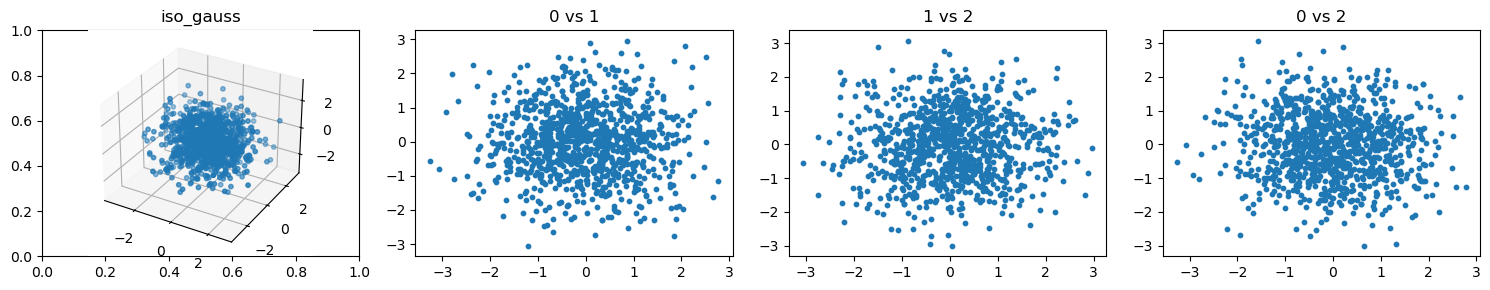

In [136]:
X = isotropic_gaussian(n_samples, n_features)
plot_3d_scatters(X,'iso_gauss')

In [137]:
def plot_kernel_fn_vs_dist(X,point=None,metric='euclidean'):

    fig, axes = plt.subplots(2, 4, figsize=(15, 12))  # 3x3 grid
    axes = axes.flatten()  # Flatten to 1D array for easy indexing

    kernel_fns_lst = list(sklearn_pairwise.kernel_metrics().keys())
    exclude_kernel_lst = ['additive_chi2','chi2']
    
    kernel_fns_lst = [v for v in kernel_fns_lst if v not in exclude_kernel_lst]

    for i,kernel_fn_str in enumerate(kernel_fns_lst):
        # print(kernel_fn_str)
        dist_from_center = dist_from_point(X,point=point,metric=metric)
        dist_from_center_norm_rad = dist_from_center
        # /np.max(dist_from_center)

        kernel_from_pt = kernel_from_point(X,point=point,kernel_fn=kernel_fn_str)

        ax = axes[i]
        ax.scatter(x=dist_from_center_norm_rad, y=kernel_from_pt)
        ax.set_title(kernel_fn_str)
        ax.set_xlabel(metric)
        # ax.set_ylabel("Kernel Value")
    
    plt.show()

In [153]:
def plot_fn_vs_dist(X,point=None,metric='euclidean'):

    fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
    axes = axes.flatten()  # Flatten to 1D array for easy indexing

    fns_lst = {}
    const_decay = 1
    fns_lst['exp_decay_dist'] = lambda distvect : np.exp(-distvect*const_decay)
    fns_lst['inv_scaled_dist'] = lambda distvect : 1 / (distvect / np.max(distvect))

    for i,fn_str in enumerate(fns_lst.keys()):

        dist_from_center = dist_from_point(X,point=point,metric=metric)
        scaled_dist_from_center = dist_from_center / np.max(dist_from_center)
        
        fn_dist_from_center = fns_lst[fn_str](scaled_dist_from_center)

        ax = axes[i]
        ax.scatter(x=scaled_dist_from_center, y=fn_dist_from_center)
        ax.set_title(fn_str)
        ax.set_xlabel(metric)
        # ax.set_ylabel("Kernel Value")
    
    plt.show()

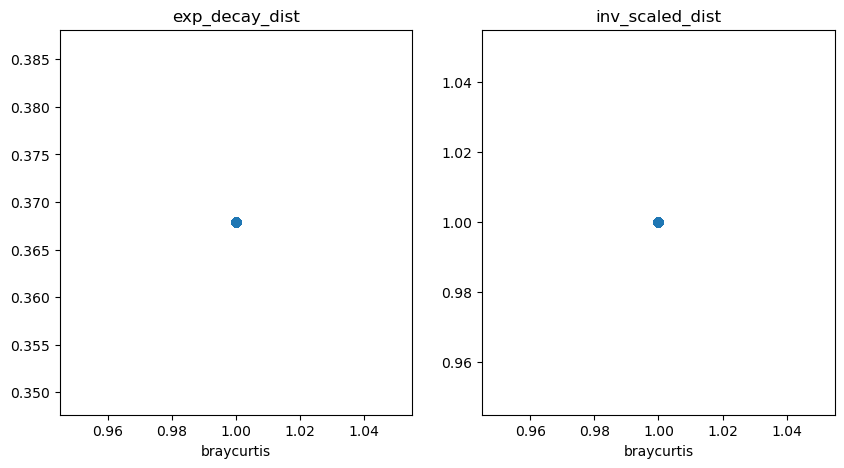

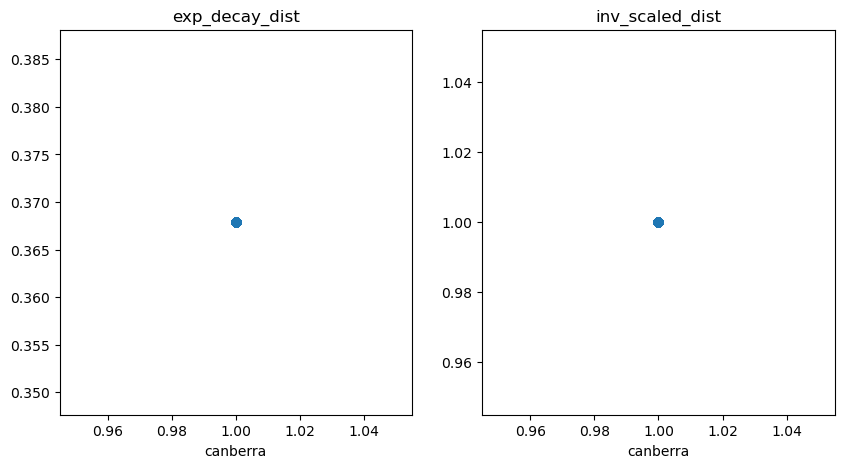

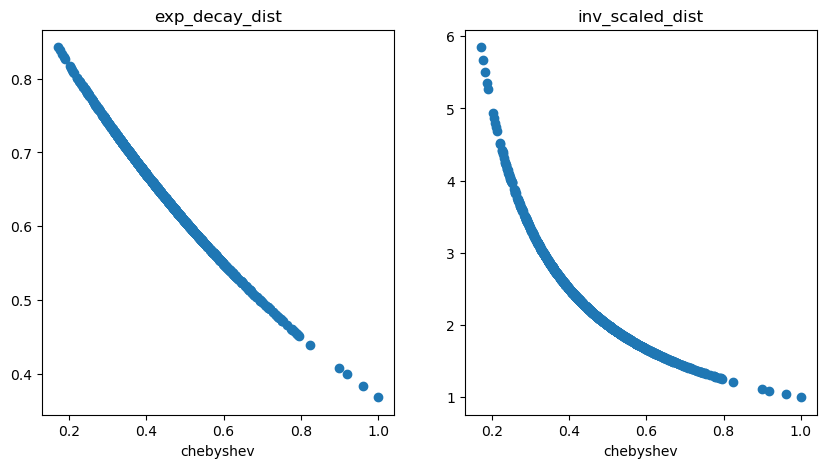

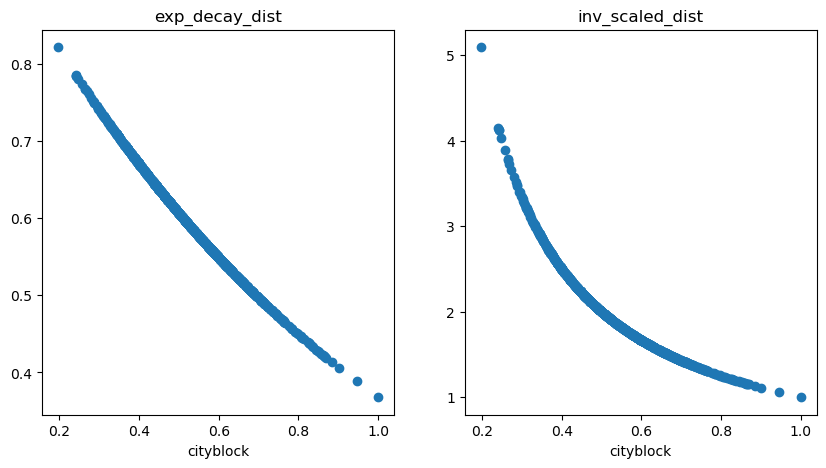

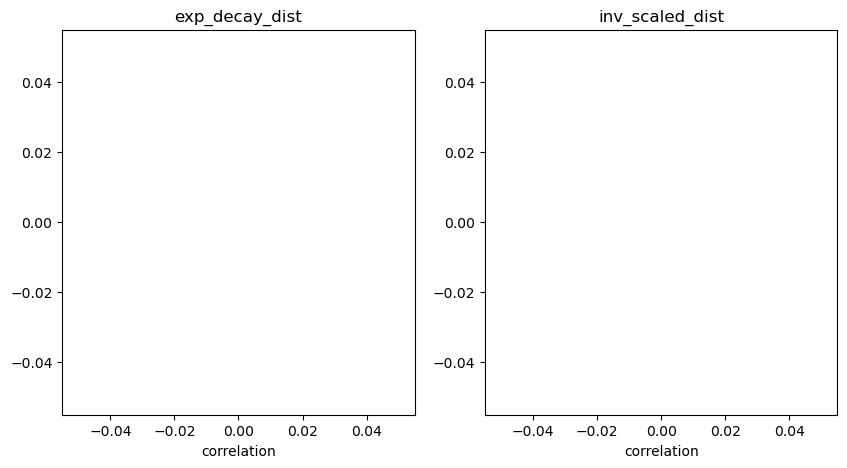

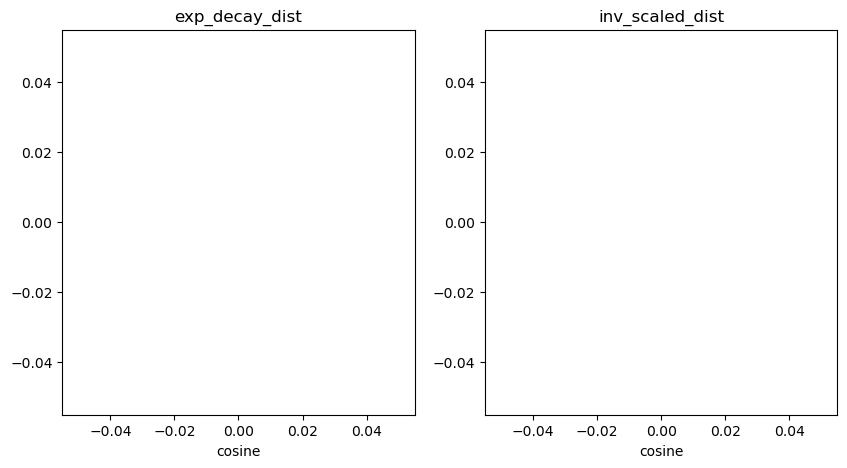

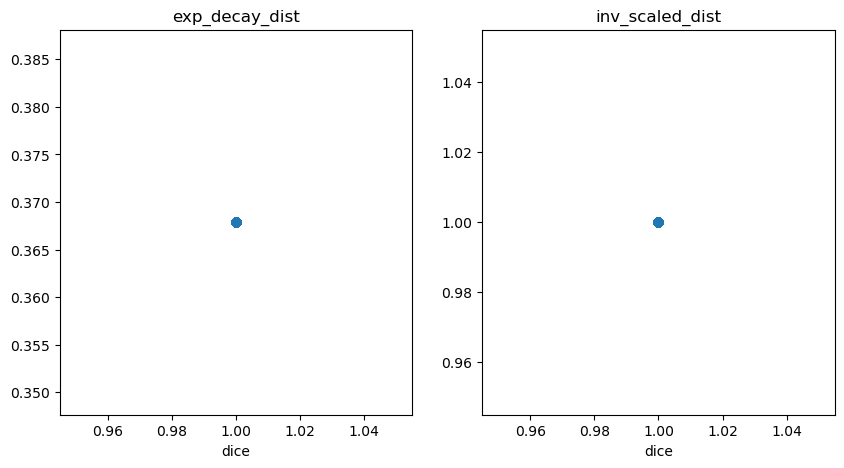

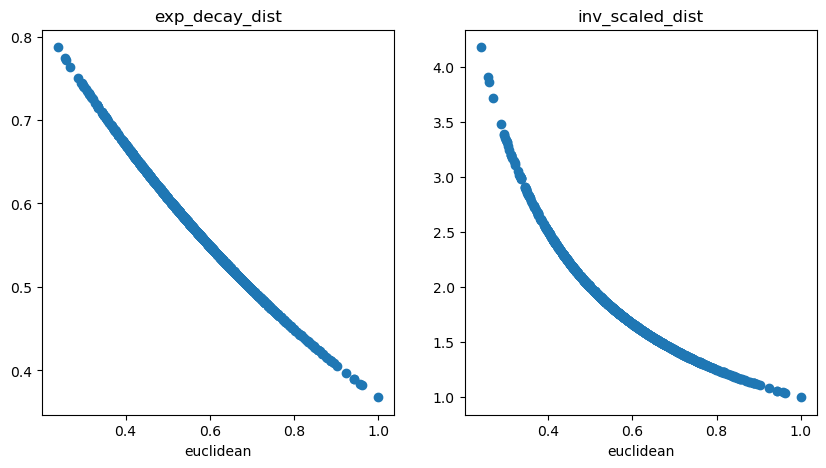

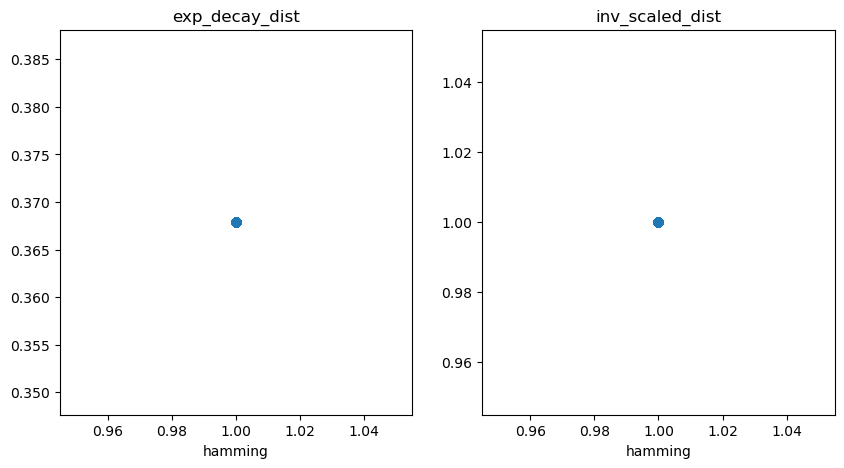

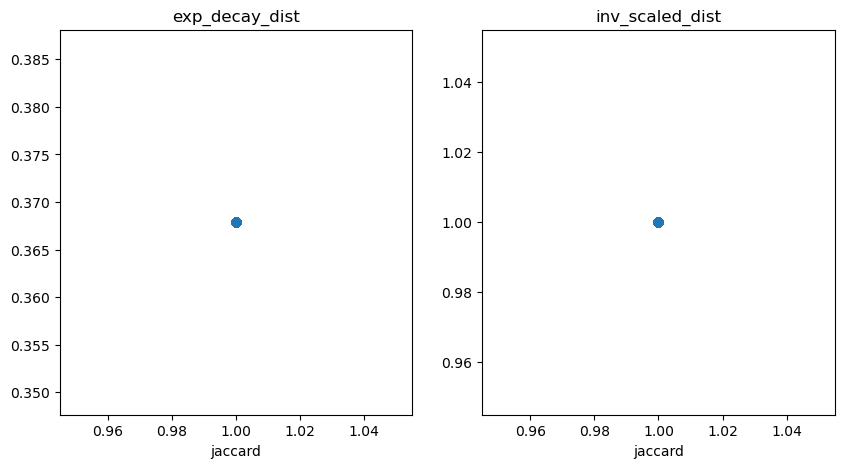

/tmp/ipykernel_73553/1375307562.py:14: RuntimeWarning: invalid value encountered in divide
  scaled_dist_from_center = dist_from_center / np.max(dist_from_center)


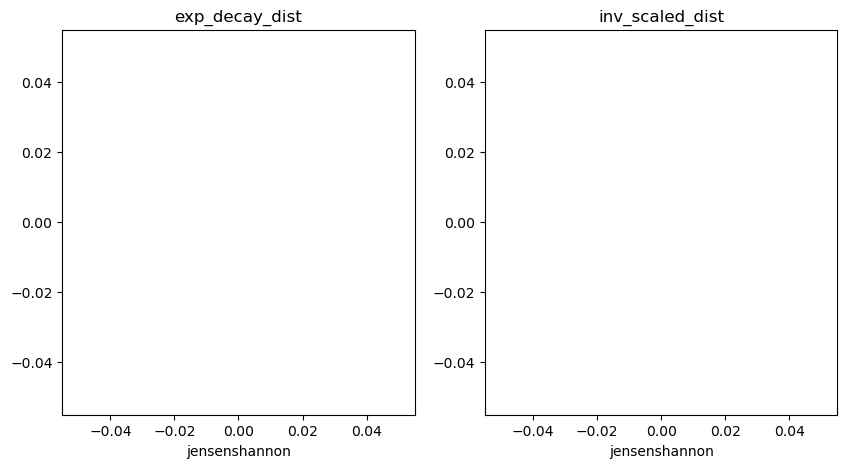

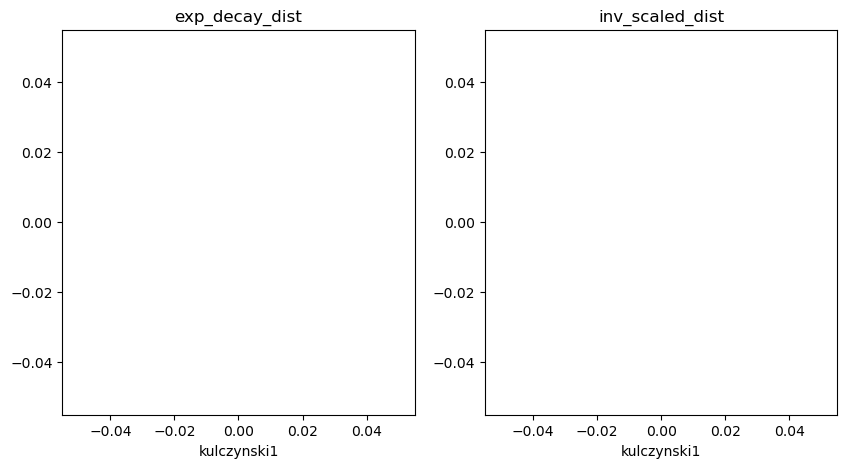

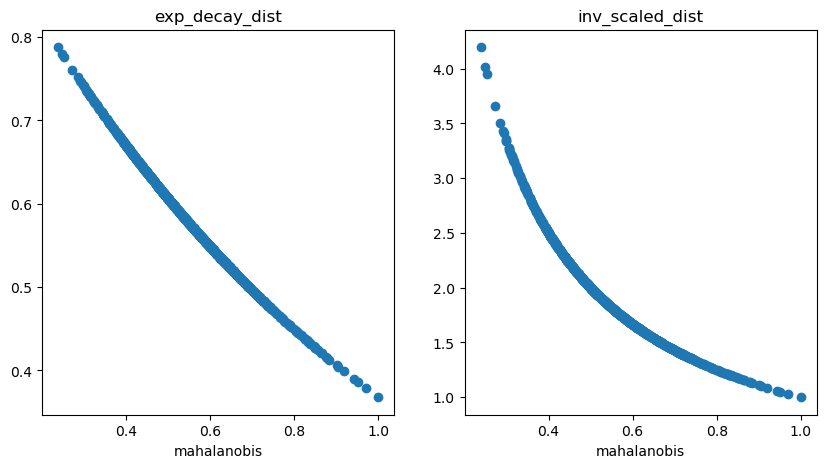

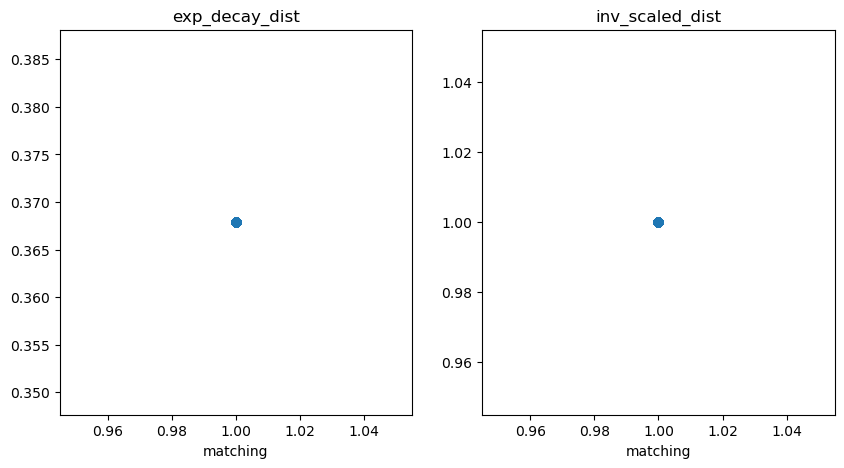

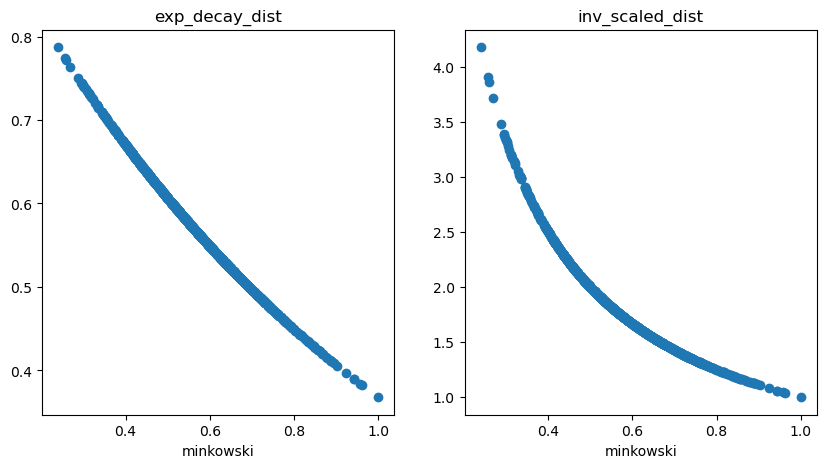

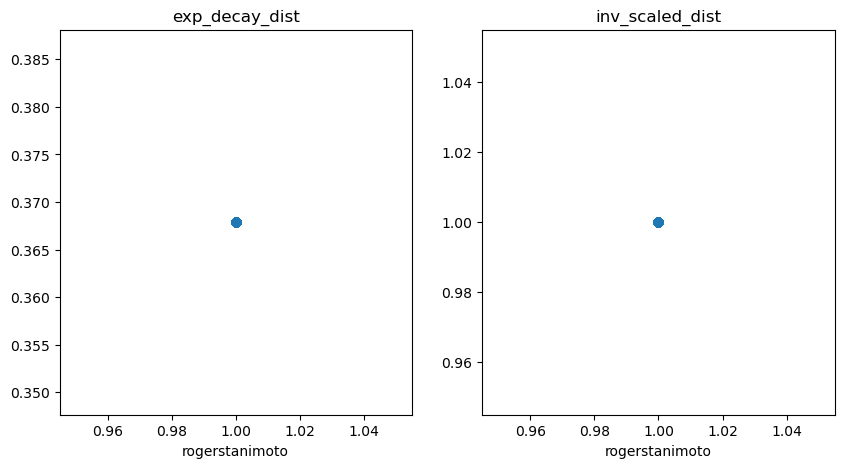

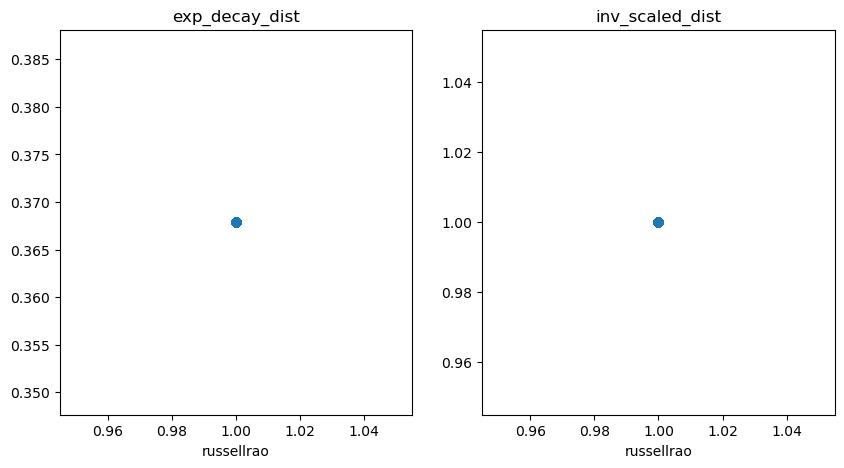

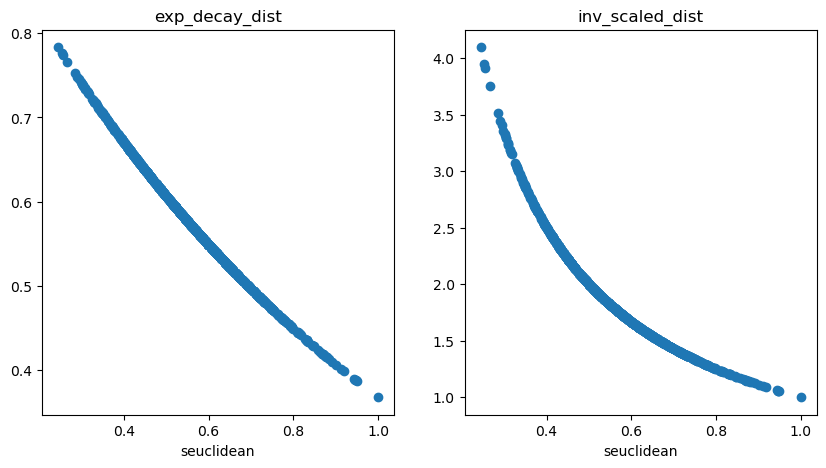

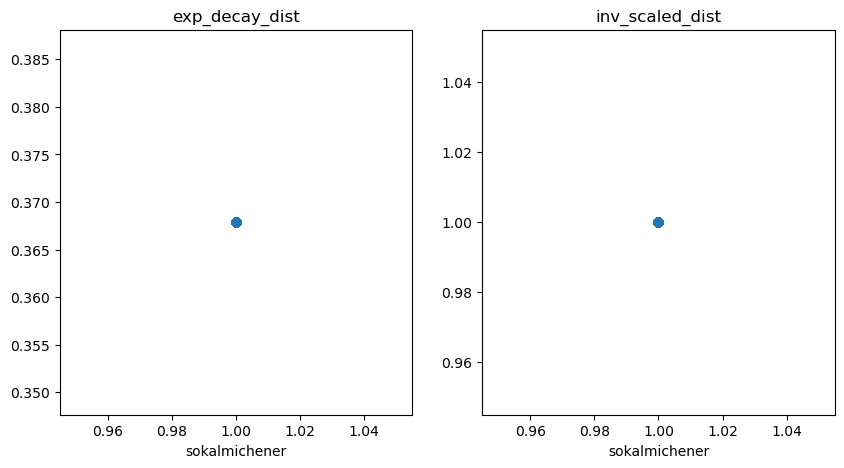

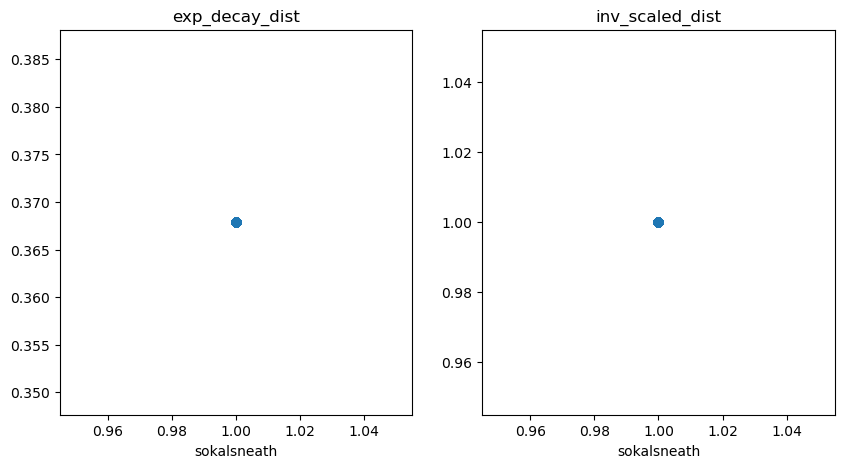

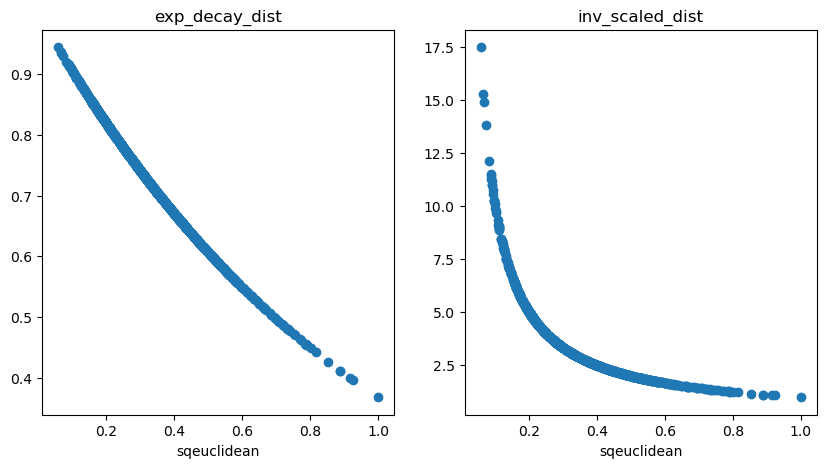

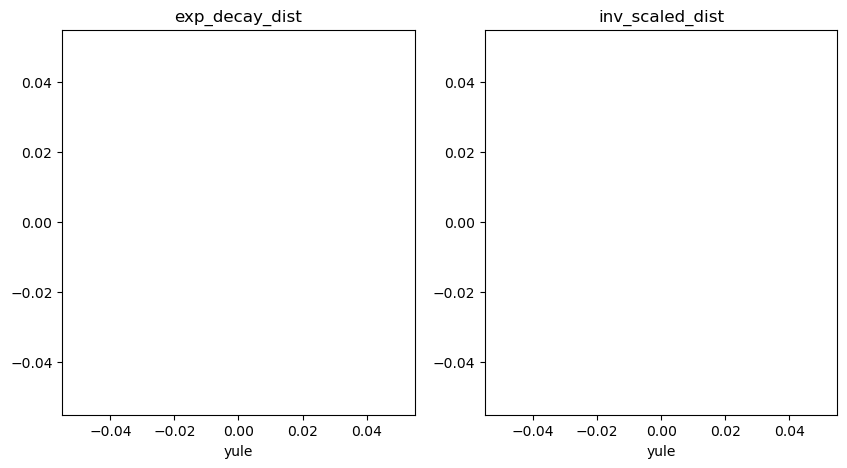

In [154]:
for metric_val in lst_metrics:
    # plot_kernel_fn_vs_dist(X,metric=metric_val)
    plot_fn_vs_dist(X,metric=metric_val)
    # plot_fn_vs_dist(gaus_heterosk_blobs[0],metric=metric_val)
    

In [150]:
# plot_fn_vs_dist(gaus_homosk_blobs[0],metric='euclidean')

In [149]:
# plot_fn_vs_dist(gaus_heterosk_blobs[0],metric='euclidean')

In [143]:
from sklearn import cluster, datasets, mixture

gaus_homosk_blobs = datasets.make_blobs(n_samples=n_samples,n_features=n_features, random_state=seed)

gaus_heterosk_blobs = datasets.make_blobs(
    n_samples=n_samples,n_features=n_features, cluster_std=[10.0, 2.5, 0.5], random_state=seed
)

In [132]:
# plot_kernel_fn_vs_dist(gaus_heterosk_blobs[0],metric='euclidean')

In [133]:
# plot_kernel_fn_vs_dist(gaus_homosk_blobs[0],metric='euclidean')

In [134]:
# plot_kernel_fn_vs_dist(X,metric='euclidean')